## **Hyperparameter Tuning**

### 1. Introduction: Hyperparameters vs. Model Parameters

* **Model Parameters:**
    * These are the internal variables of a model that are learned from the data during the training process.
    * Examples include the weights and biases in a neural network, the coefficients in a linear regression, or the split points in a decision tree.
    * Model parameters are automatically adjusted by the learning algorithm.
* **Hyperparameters:**
    * These are the settings that are set *before* the training process begins.
    * They control the learning process itself and influence the model's complexity and performance.
    * Examples include the learning rate in gradient descent, the number of trees in a random forest, or the regularization strength in a support vector machine.
    * Hyperparameters are *not* learned from the data; they must be set by the user.
* **Importance of Hyperparameter Tuning:**
    * Hyperparameters significantly impact a model's performance.
    * Optimal hyperparameter values can lead to improved accuracy, faster training, and better generalization.
    * Tuning hyperparameters is a crucial step in the machine learning workflow.

### 2. Grid Search (Instructive Iris Dataset)

* **Concept:**
    * Grid search is a systematic approach to hyperparameter tuning.
    * It involves defining a grid of hyperparameter values and evaluating the model's performance for every possible combination of these values.
    * The combination that yields the best performance is selected.
* **Process:**
    1.  Define the hyperparameters to tune and the range of values to explore for each hyperparameter.
    2.  Create a grid of all possible hyperparameter combinations.
    3.  For each combination:
        * Train the model using the training data and the current hyperparameter settings.
        * Evaluate the model's performance using a validation set or cross-validation.
    4.  Select the hyperparameter combination that results in the best performance.
* **Advantages:**
    * Guaranteed to find the optimal hyperparameter values within the specified grid.
    * Simple to understand and implement.
* **Disadvantages:**
    * Computationally expensive, but we'll mitigate this by working with small datasets, like the iris dataset.
* **Key Idea for Instructive Learning:**
    * Use the Iris dataset to illustrate the concepts without perfect accuracy.
    * Reduce training data to make the problem harder.
    * Focus on hyperparameter interpretation and analysis of the classification report.

## **Code Example 1: Grid Search with Logistic Regression**

In [7]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Reduce training data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, random_state=42
)

# Add noise
noise = np.random.normal(0, 0.3, X_train.shape)
X_train = X_train + noise

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
%%time

# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=200),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
)

# Fit the Grid Search
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: user 82.4 ms, sys: 5.32 ms, total: 87.7 ms
Wall time: 170 ms


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=200, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [9]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [10]:
# Evaluate on the test set
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Test Set Accuracy:", accuracy)
print("Classification Report:\n", report)

Test Set Accuracy: 0.9166666666666666
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.89      0.85      0.87        39
           2       0.85      0.89      0.87        38

    accuracy                           0.92       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120



* **Code Explanation 1: (Presentation Flow)**
    * We load the Iris dataset and reduce training data.
    * We add noise to make the problem more challenging.
    * We scale the data using `StandardScaler()`.
    * We define a larger `param_grid` for Logistic Regression.
    * We use `GridSearchCV` to find the best hyperparameters.
    * We evaluate the best model and print the results.

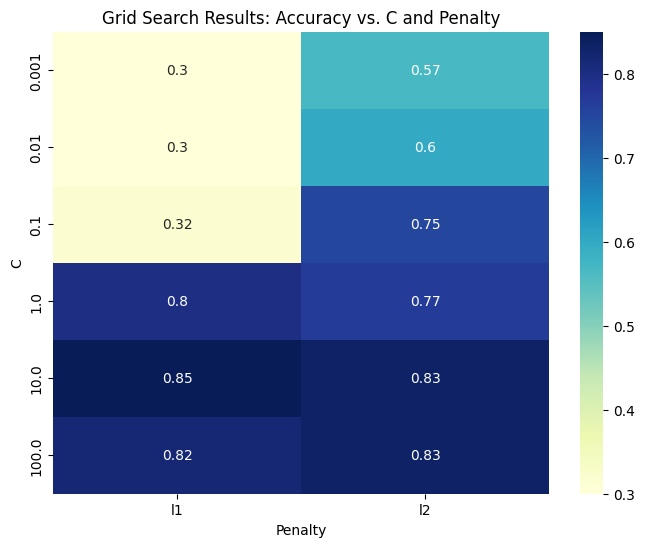

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert results to a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Create a pivot table for the heatmap
pivot_table = results_df.pivot_table(
    index='param_C', columns='param_penalty', values='mean_test_score'
)

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
plt.title('Grid Search Results: Accuracy vs. C and Penalty')
plt.xlabel('Penalty')
plt.ylabel('C')
plt.show()

> This heatmap visualizes the accuracy for different combinations of `C` and `penalty`.

## **Code Example 2: Grid Search with Random Forest**

In [12]:
%%time

from sklearn.ensemble import RandomForestClassifier

# Define a larger hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 3, 5, 10],
    'criterion': ['gini', 'entropy'],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
)

# Fit the Grid Search
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits
CPU times: user 5.8 s, sys: 900 ms, total: 6.7 s
Wall time: 4min 45s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, None],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='accuracy', verbose=1)

In [13]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [14]:
# Get the best model
best_model = grid_search.best_estimator_

# Evaluate
y_pred = best_model.predict(X_test)
print('Test Set Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Test Set Accuracy: 0.9583333333333334
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.92      0.94        39
           2       0.92      0.95      0.94        38

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



* **Code Explanation 2 (Iris):**
    * Larger `param_grid` for Random Forest.

## **Code Example 3: Grid Search with Decision Tree**

In [15]:
%%time

from sklearn.tree import DecisionTreeClassifier

# Define a larger hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 3, 5, 10],
    'criterion': ['gini', 'entropy'],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
)

# Fit the Grid Search
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
CPU times: user 380 ms, sys: 11.3 ms, total: 391 ms
Wall time: 624 ms


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy', verbose=1)

In [16]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [17]:
# Evaluate
y_pred = best_model.predict(X_test)
print('Test Set Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Test Set Accuracy: 0.9583333333333334
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.92      0.94        39
           2       0.92      0.95      0.94        38

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



## **Code Example 4: Grid Search with K-Nearest Neighbors (KNN) (Iris)**

In [18]:
%%time

from sklearn.neighbors import KNeighborsClassifier

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
)

# Fit the Grid Search
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
CPU times: user 104 ms, sys: 7.58 ms, total: 112 ms
Wall time: 278 ms


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 10, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [19]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}


In [20]:
# Evaluate
y_pred = best_model.predict(X_test)
print('Test Set Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Test Set Accuracy: 0.9583333333333334
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.92      0.94        39
           2       0.92      0.95      0.94        38

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



## **Code Example 5: Grid Search with AdaBoost (Iris)**

In [21]:
%%time

from sklearn.ensemble import AdaBoostClassifier

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 1],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    AdaBoostClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
)

# Fit the Grid Search
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
CPU times: user 375 ms, sys: 12.7 ms, total: 388 ms
Wall time: 5.46 s


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy', verbose=1)

In [22]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

Best Hyperparameters: {'learning_rate': 0.01, 'n_estimators': 200}


In [23]:
# Evaluate
y_pred = best_model.predict(X_test)
print('Test Set Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Test Set Accuracy: 0.9583333333333334
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.92      0.94        39
           2       0.92      0.95      0.94        38

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



## GBM

In [24]:
%%time

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Reduce training data and add noise (as before)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, random_state=42
)
noise = np.random.normal(0, 0.1, X_train.shape)
X_train = X_train + noise

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a hyperparameter grid for GBM
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
)

# Fit the Grid Search
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('Test Set Accuracy:', accuracy)
print('Classification Report:\n', report)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 0.8}
Test Set Accuracy: 0.9583333333333334
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.93      0.95      0.94        39
           2       0.95      0.92      0.93        38

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120

CPU times: user 8.08 s, sys: 1.47 s, total: 9.55 s
Wall time: 6min 28s


### 3. Random Search

* **Concept:**
    * Random search is an alternative to grid search that involves randomly sampling hyperparameter combinations from a specified distribution.
    * Instead of exploring every possible combination, random search explores a subset of the hyperparameter space.
* **Process:**
    1.  Define the hyperparameters to tune and the distribution of values to sample from for each hyperparameter.
    2.  Specify the number of hyperparameter combinations to sample.
    3.  For each sampled combination:
        * Train the model using the training data and the current hyperparameter settings.
        * Evaluate the model's performance using a validation set or cross-validation.
    4.  Select the hyperparameter combination that results in the best performance.
* **Advantages:**
    * Computationally less expensive than grid search, especially when some hyperparameters are more important than others.
    * Can find better hyperparameter combinations than grid search in the same amount of time, especially when some hyperparameters are not important.
* **Disadvantages:**
    * May not find the absolute best hyperparameter combination, as it doesn't explore the entire grid.
    * The results can be less reproducible than grid search, as the sampled combinations are random.

<br>

* **Code Example 1: Random Search with Logistic Regression (Iris)**
  
and; let's compare the time differences

In [25]:
%%time

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define a distribution for C
param_distributions = {
    'C': uniform(0.001, 100),  # Uniform distribution between 0.001 and 100.001
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    LogisticRegression(random_state=42, max_iter=200),
    param_distributions,
    n_iter=50,  # Number of hyperparameter combinations to sample
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
    random_state=42,
)

# Fit the Random Search
random_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
CPU times: user 154 ms, sys: 4.15 ms, total: 158 ms
Wall time: 358 ms


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=200, random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7d048de179d0>,
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, scoring='accuracy', verbose=1)

In [26]:
# Get the best hyperparameters
best_params = random_search.best_params_
print('Best Hyperparameters:', best_params)

Best Hyperparameters: {'C': 12.204823484477883, 'penalty': 'l1', 'solver': 'saga'}


In [27]:
# Get the best model
best_model = random_search.best_estimator_

# Evaluate on the test set
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('Test Set Accuracy:', accuracy)
print('Classification Report:\n', report)

Test Set Accuracy: 0.975
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      0.92      0.96        39
           2       0.93      1.00      0.96        38

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



* **Code Explanation 1 (Random Search):**
    * We use `RandomizedSearchCV` instead of `GridSearchCV`.
    * We define `param_distributions` instead of `param_grid`, specifying the distribution of values for each hyperparameter.
    * We set `n_iter` to control the number of hyperparameter combinations to sample.
    * We use `scipy.stats.uniform` to create uniform distributions for numerical hyperparameters.

## **Code Example 2: Random Search with Random Forest (Iris)**

In [28]:
%%time

from scipy.stats import randint

param_distributions = {
    'n_estimators': randint(50, 300),
    'max_depth': [5, 10, 15, None],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'criterion': ['gini', 'entropy'],
}

random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
    random_state=42,
)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
CPU times: user 883 ms, sys: 98.5 ms, total: 982 ms
Wall time: 30.7 s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d04b2b1e560>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d04b2b1fc70>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d04b2b1f2e0>},
                   random_state=42, scoring='accuracy', verbose=1)

In [29]:
best_params = random_search.best_params_
print('Best Hyperparameters:', best_params)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 216}


In [30]:
best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test)
print('Test Set Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Test Set Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.92      0.92      0.92        39
           2       0.92      0.92      0.92        38

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120




### 4. Other Hyperparameter Tuning Methods

* **Bayesian Optimization:**
    * A more advanced technique that uses a probabilistic model to guide the search for optimal hyperparameters.
    * It builds a surrogate model of the objective function (e.g., cross-validation accuracy) and uses it to select the next hyperparameter combination to evaluate.
    * Can be more efficient than grid search and random search, especially when the hyperparameter space is large and the objective function is expensive to evaluate.
* **Genetic Algorithms:**
    * Inspired by the process of natural selection.
    * It involves creating a population of hyperparameter combinations and iteratively evolving them using operators like selection, crossover, and mutation.
    * Can be effective for complex hyperparameter spaces but can also be computationally expensive.
* **Hyperband:**
    * A bandit-based approach that allocates more resources (e.g., training epochs) to promising hyperparameter combinations.
    * It starts by evaluating many random combinations with few resources and gradually eliminates the least promising ones.
    * Can be more efficient than random search and Bayesian optimization, especially when the evaluation cost varies significantly across hyperparameter combinations.
* **Libraries:**
    * Libraries like `scikit-optimize` and `hyperopt` provide implementations of Bayesian optimization and other hyperparameter tuning methods.

### 5. Practical Considerations

* **Computational Cost:**
    * Hyperparameter tuning can be computationally expensive, especially for complex models and large datasets.
    * Consider using techniques like random search or Bayesian optimization to reduce the search space.
* **Cross-Validation:**
    * Always use cross-validation to evaluate model performance during hyperparameter tuning.
    * This provides a more robust estimate of the model's generalization performance.
* **Domain Knowledge:**
    * Use domain knowledge to guide the hyperparameter search.
    * Understanding the problem and the model can help you narrow down the search space and identify promising hyperparameter values.